<center>
  <h1 style="font-family: 'Times New Roman', Times, serif; font-size: 60px;">DAA</h1>
  <h2 style="font-family: 'Times New Roman', Times, serif; font-size: 40px;">Data Exploration and Descriptive Statistics After Pre-Processing</h2>
</center>

<h3 style="font-family: 'Times New Roman'">Import Libraries</h3>

In [1]:
# Import necessary libraries
import pandas as pd                                        # Import pandas for data manipulation and analysis
import numpy as np                                         # Import numpy for numerical computations
import matplotlib.pyplot as plt                            # Import matplotlib for data visualization
from sklearn.feature_selection import mutual_info_classif  # Import a function for mutual information classification
import seaborn as sns                                      # Import seaborn for enhanced data visualization~
from sklearn.preprocessing import LabelEncoder

<h3 style="font-family: 'Times New Roman'">Load Dataset After Pre Processing</h3>

In [2]:
df = pd.read_csv('Files/Pre_Processing/Drinking.csv')

<h3 style="font-family: 'Times New Roman'">Data Exploration Before Pre-Processing</h3>

In [3]:
label_encoder = LabelEncoder()

# # Apply label encoding to each column
df['eye_sight_left'] = label_encoder.fit_transform(df['eye_sight_left'])
df['eye_sight_right'] = label_encoder.fit_transform(df['eye_sight_right'])

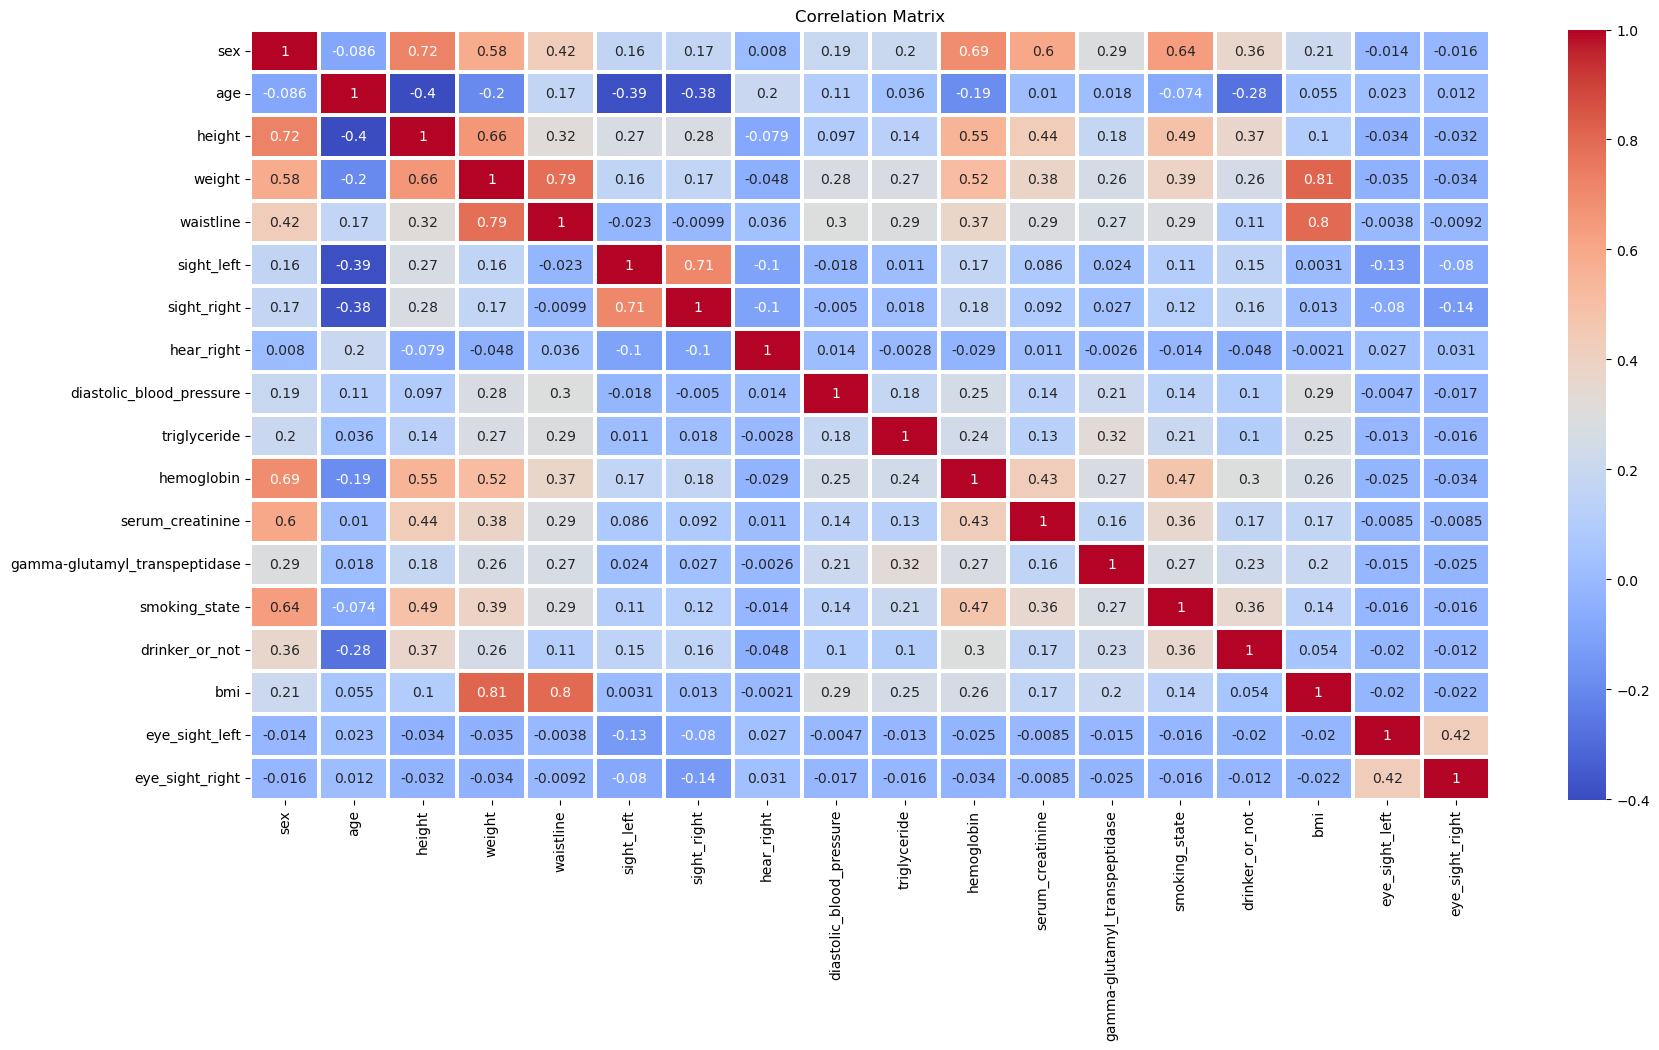

In [4]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title("Correlation Matrix")
plt.show()

                          Feature  Mutual_Information_Drinker
14                            bmi                    0.076695
2                          height                    0.070955
0                             sex                    0.070770
13                  smoking_state                    0.069392
10                     hemoglobin                    0.054281
12  gamma-glutamyl_transpeptidase                    0.050348
1                             age                    0.045024
3                          weight                    0.035893
11               serum_creatinine                    0.018213
9                    triglyceride                    0.013817
5                      sight_left                    0.010711
6                     sight_right                    0.009825
16                eye_sight_right                    0.008744
15                 eye_sight_left                    0.007143
7                      hear_right                    0.005875
4       

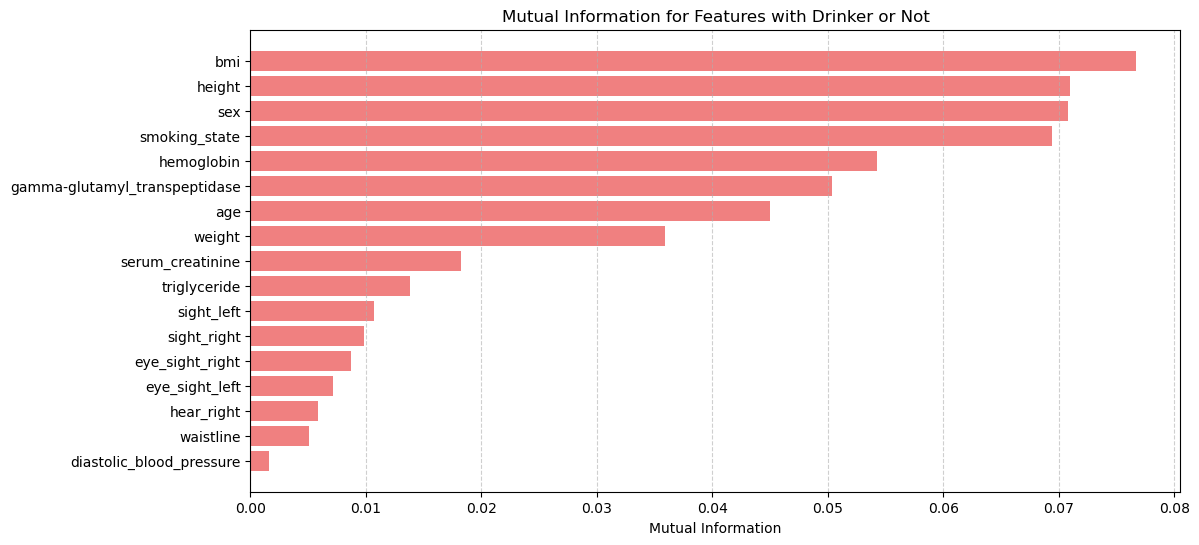

In [5]:
target_drinker = df['drinker_or_not']

# Drop the target columns from the features
features = df.drop(['drinker_or_not'], axis=1)

# Calculate mutual information for each feature with respect to the target variables
mi_drinker = mutual_info_classif(features, target_drinker, discrete_features='auto', random_state=42)

# Create DataFrames to show the results
mi_results_drinker = pd.DataFrame({'Feature': features.columns, 'Mutual_Information_Drinker': mi_drinker})

print(mi_results_drinker.sort_values(by='Mutual_Information_Drinker', ascending=False))

# Order the features by mutual information for 'drinker_or_not'
sorted_mi_drinker = mi_results_drinker.sort_values(by='Mutual_Information_Drinker', ascending=False)

# Plot for 'drinker_or_not'
plt.figure(figsize=(12, 6))
plt.barh(sorted_mi_drinker['Feature'], sorted_mi_drinker['Mutual_Information_Drinker'], color='lightcoral')
plt.xlabel('Mutual Information')
plt.title('Mutual Information for Features with Drinker or Not')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [6]:
# df = df.to_csv('Files/Exploration_and_Stats_AfterPP/Drinking.csv', index = False)

<h3 style="font-family: 'Times New Roman'"> Descriptive Statistics Before Pre-Processing</h3>

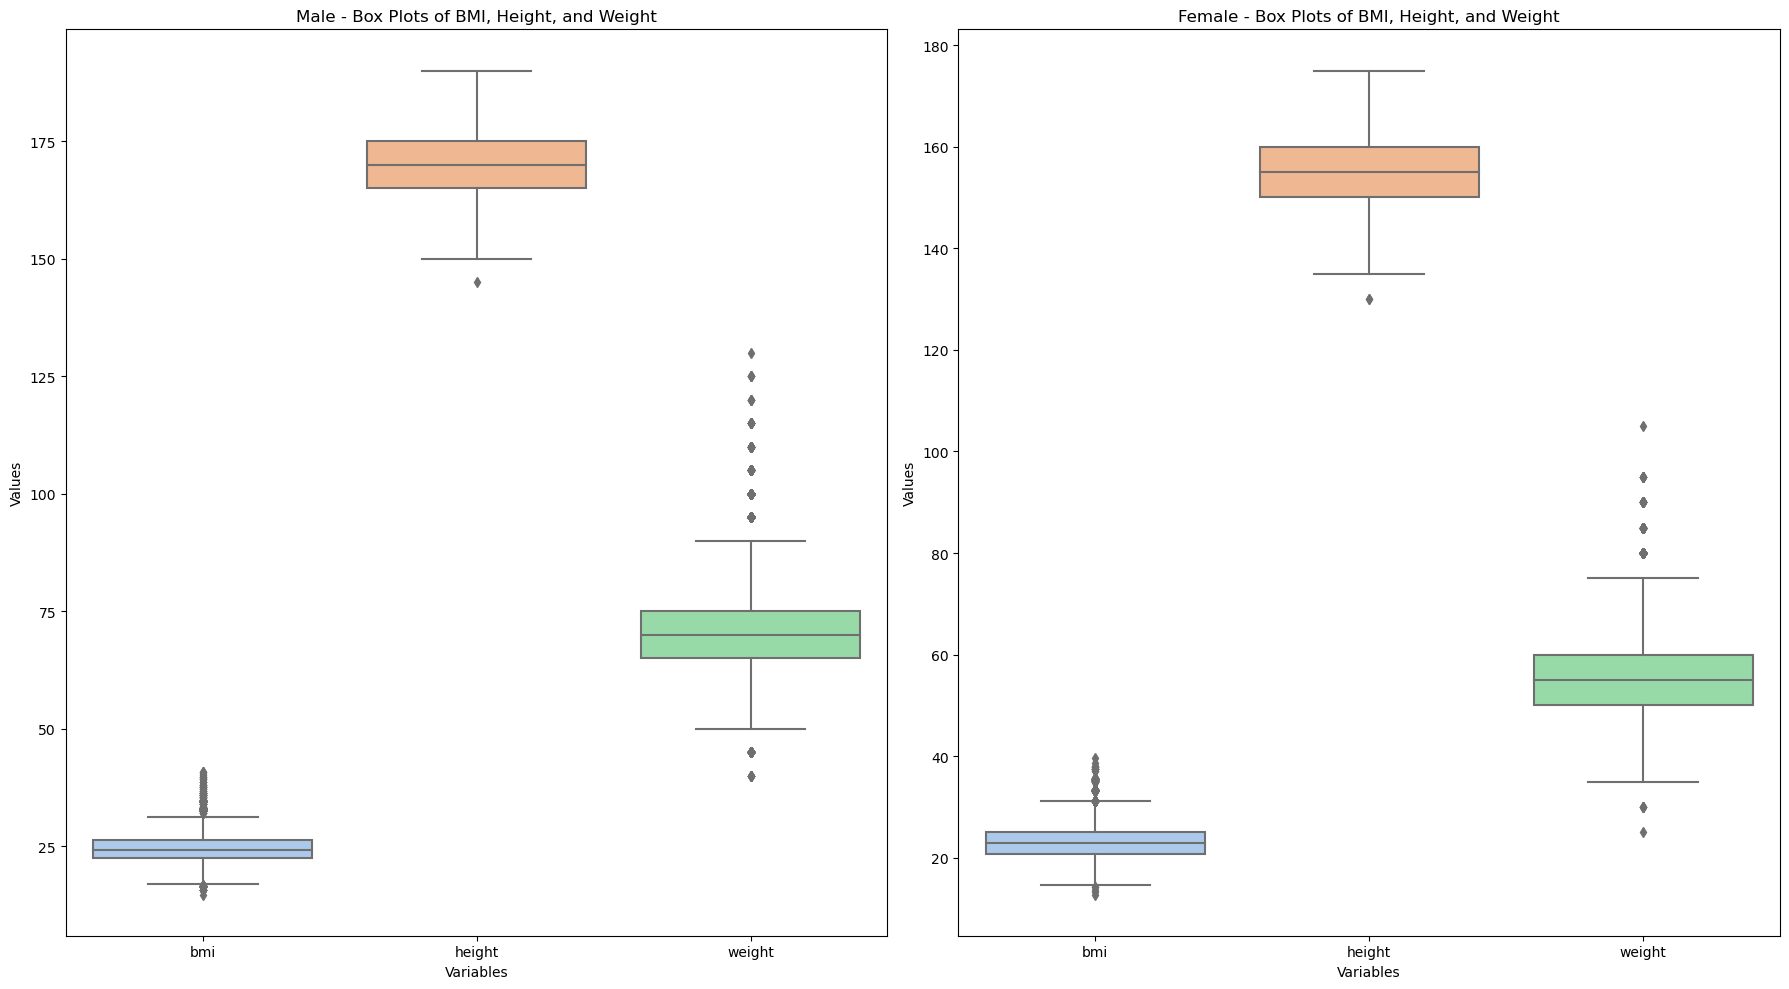

In [7]:
# Filter DataFrame for male (sex=1)
male_df = df[df['sex'] == 1]

# Create box plots for male (excluding 'age')
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='variable', y='value', data=pd.melt(male_df[['bmi', 'height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Male - Box Plots of BMI, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

# Filter DataFrame for female (sex=0)
female_df = df[df['sex'] == 0]

# Create box plots for female (excluding 'age')
plt.subplot(1, 2, 2)
sns.boxplot(x='variable', y='value', data=pd.melt(female_df[['bmi', 'height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Female - Box Plots of BMI, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

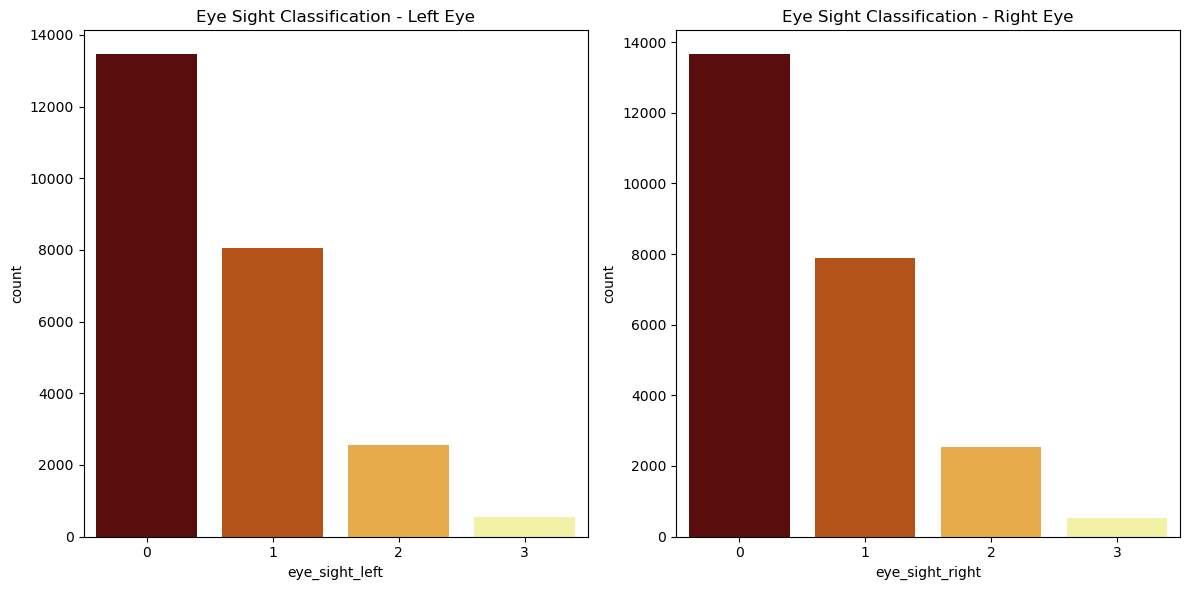

In [8]:
plt.figure(figsize=(12, 6))

# Count plot for 'eye_sight_left'
plt.subplot(1, 2, 1)
sns.countplot(x='eye_sight_left', data=df, palette='afmhot')
plt.title('Eye Sight Classification - Left Eye')

# Count plot for 'eye_sight_right'
plt.subplot(1, 2, 2)
sns.countplot(x='eye_sight_right', data=df, palette='afmhot')
plt.title('Eye Sight Classification - Right Eye')

plt.tight_layout()
plt.show()

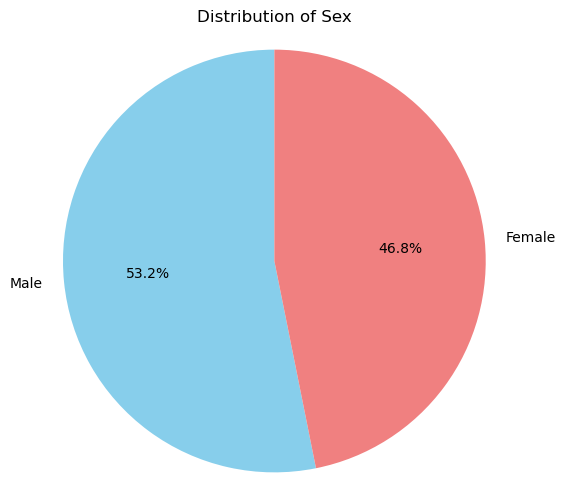

In [9]:
# Count the occurrences of each sex category in the 'sex' column
sex_counts = df['sex'].value_counts()

# Create a pie chart to visualize the distribution of sex
plt.figure(figsize=(6, 6))
labels = ['Male', 'Female']
colors = ['skyblue', 'lightcoral']
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()

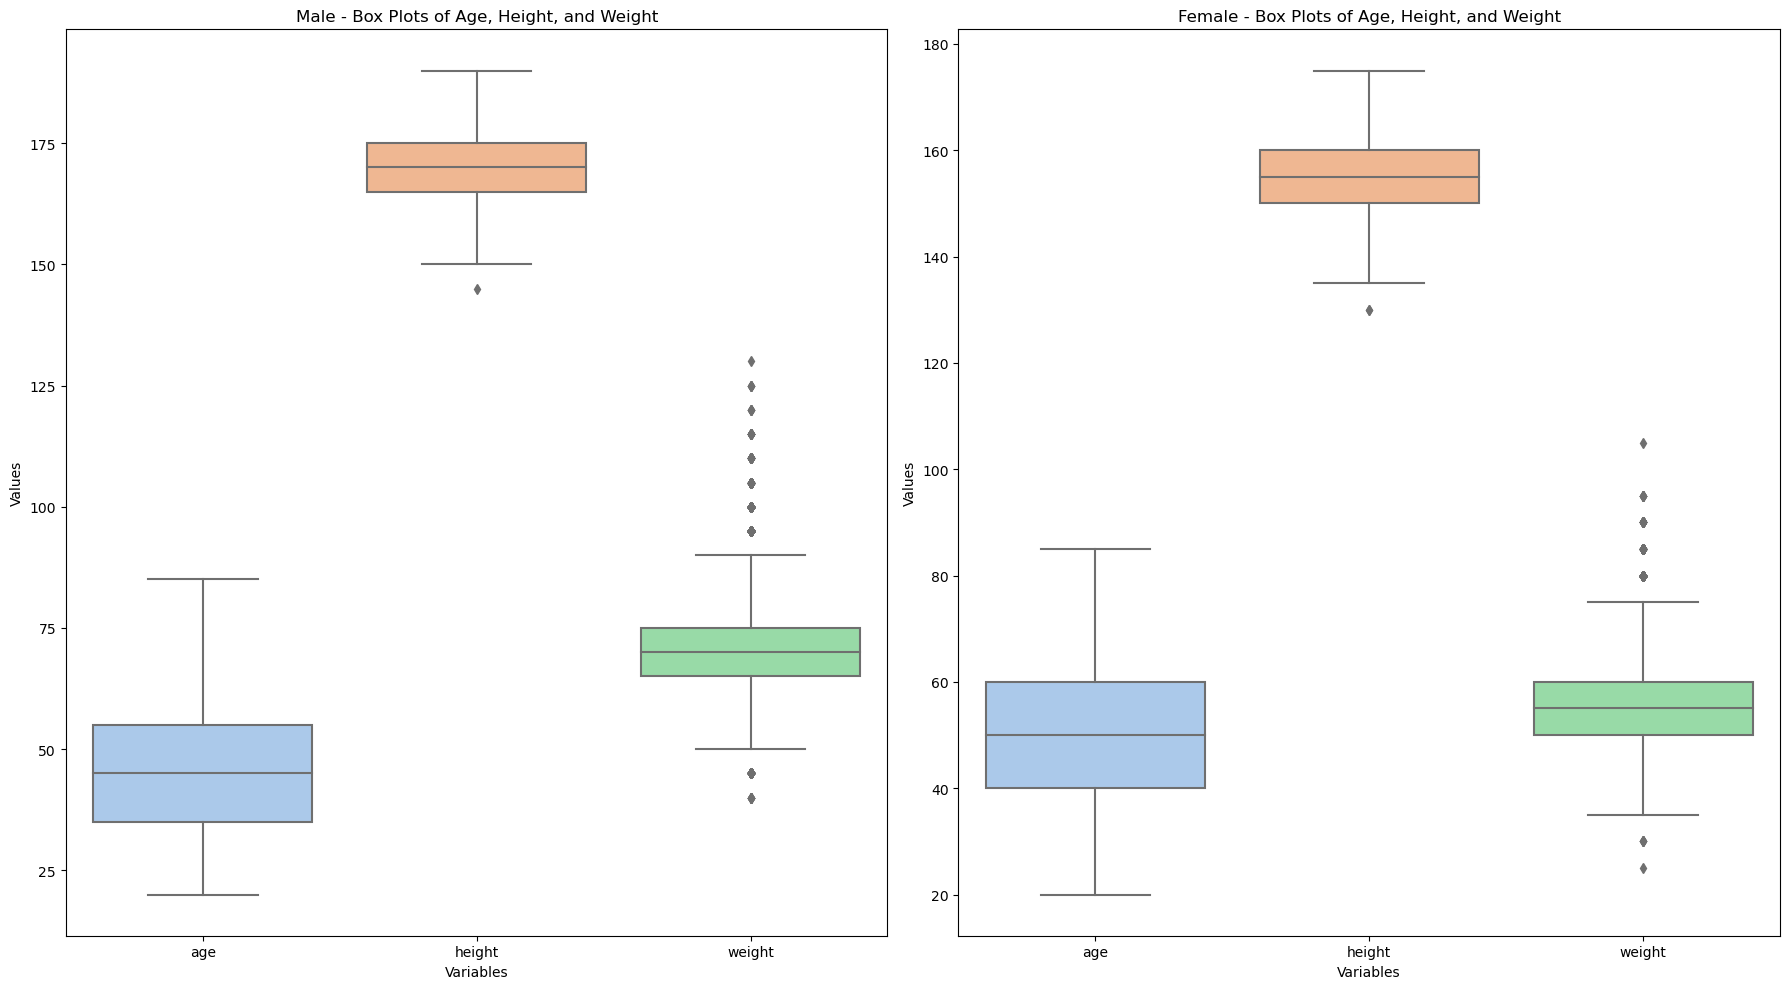

In [10]:
# Filter DataFrame for male (sex=1)
male_df = df[df['sex'] == 1]

# Create box plots for male
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='variable', y='value', data=pd.melt(male_df[['age', 'height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Male - Box Plots of Age, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

# Filter DataFrame for female (sex=0)
female_df = df[df['sex'] == 0]

# Create box plots for female
plt.subplot(1, 2, 2)
sns.boxplot(x='variable', y='value', data=pd.melt(female_df[['age', 'height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Female - Box Plots of Age, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

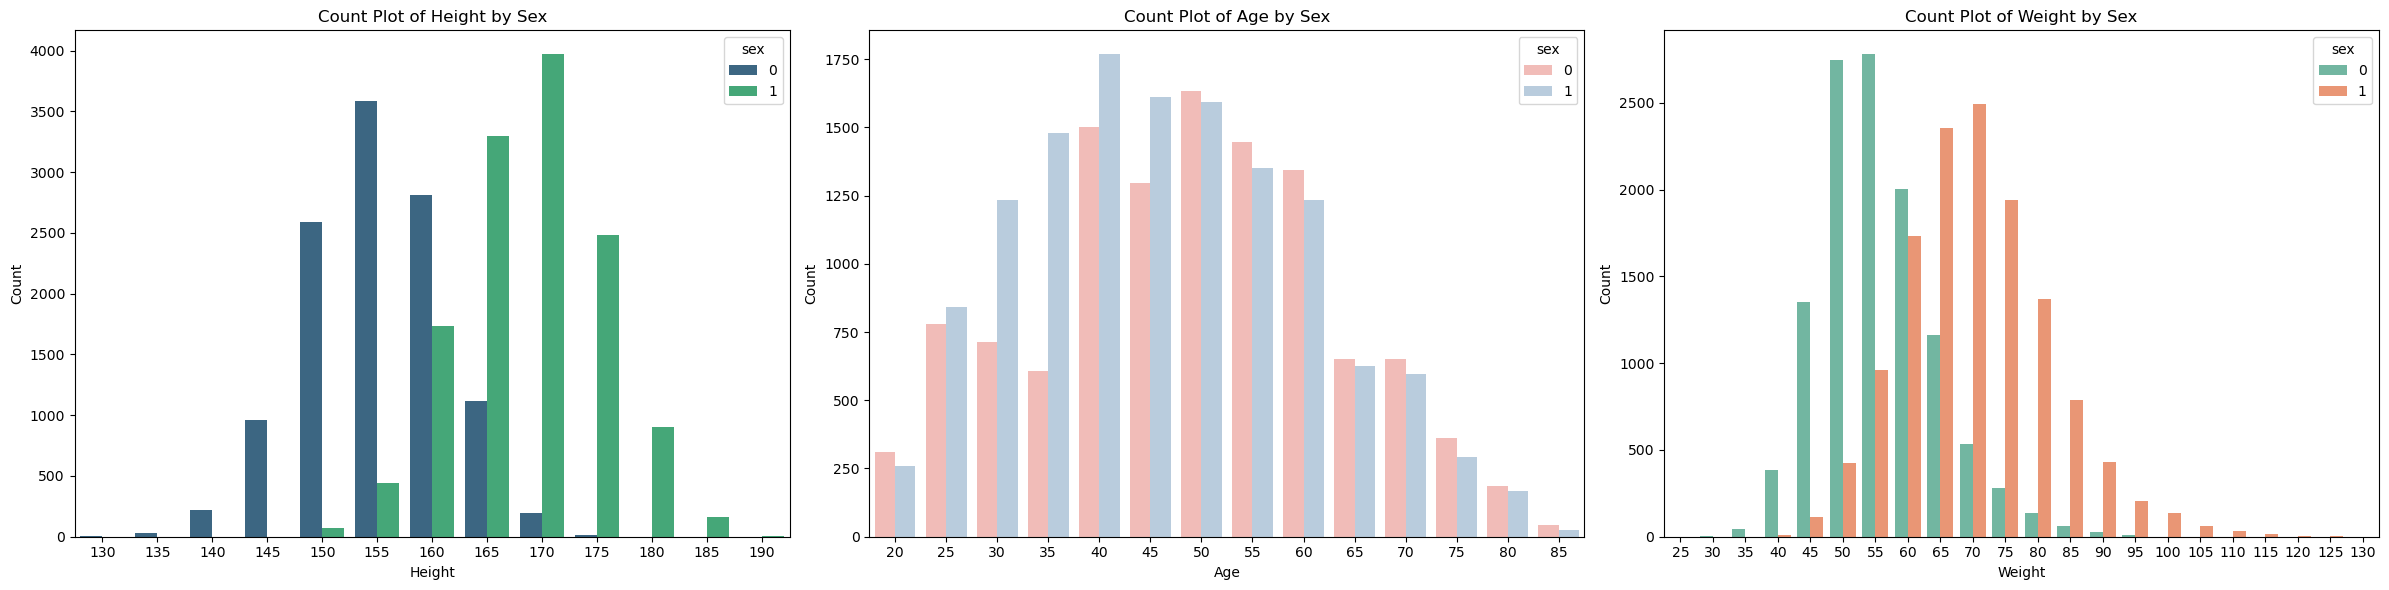

In [11]:
# Set up a 1x3 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Plot the first count plot
sns.countplot(x='height', hue='sex', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Count Plot of Height by Sex')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Count')

# Plot the second count plot
sns.countplot(x='age', hue='sex', data=df, palette='Pastel1', ax=axes[1])
axes[1].set_title('Count Plot of Age by Sex')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Plot the third count plot
sns.countplot(x='weight', hue='sex', data=df, palette='Set2', ax=axes[2])
axes[2].set_title('Count Plot of Weight by Sex')
axes[2].set_xlabel('Weight')
axes[2].set_ylabel('Count')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

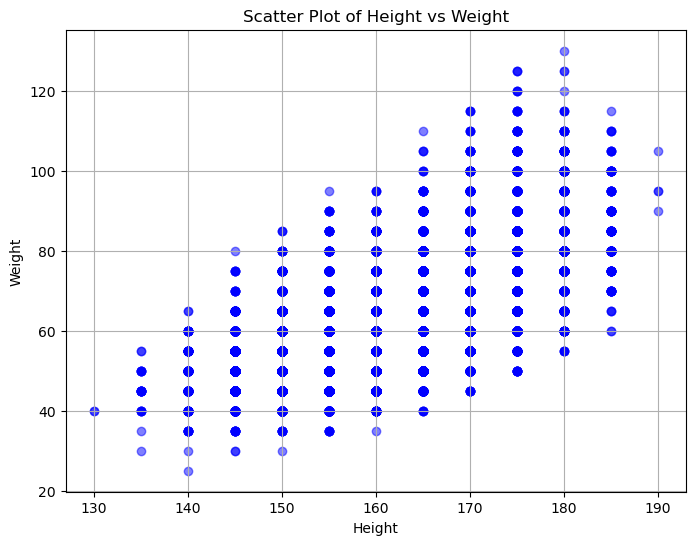

In [12]:
# Create a scatter plot to visualize the relationship between 'systolic_blood_pressure' and 'diastolic_blood_pressure'
plt.figure(figsize=(8, 6))
plt.scatter(df['height'], df['weight'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

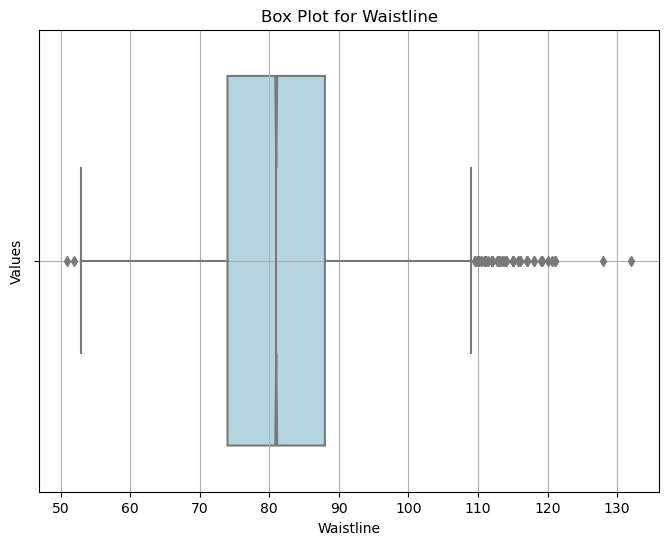

In [13]:
variable_name = 'waistline'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df[variable_name], color='lightblue', notch=True)
plt.xlabel(f'{variable_name.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name.capitalize()}')
plt.grid(True)
plt.show()

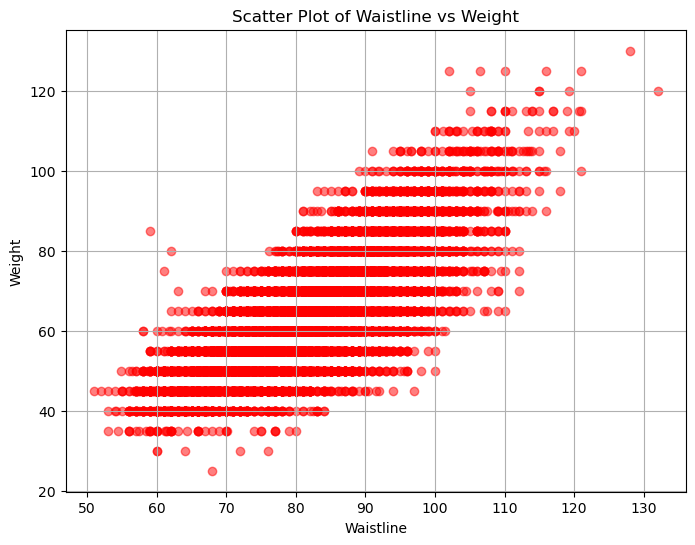

In [14]:
# Remove rows with 'waistline' bigger than 900
filtered_df = df[df['waistline'] <= 900]

# Create a scatter plot with the filtered DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['waistline'], filtered_df['weight'], alpha=0.5, c='red')
plt.title('Scatter Plot of Waistline vs Weight')
plt.xlabel('Waistline')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

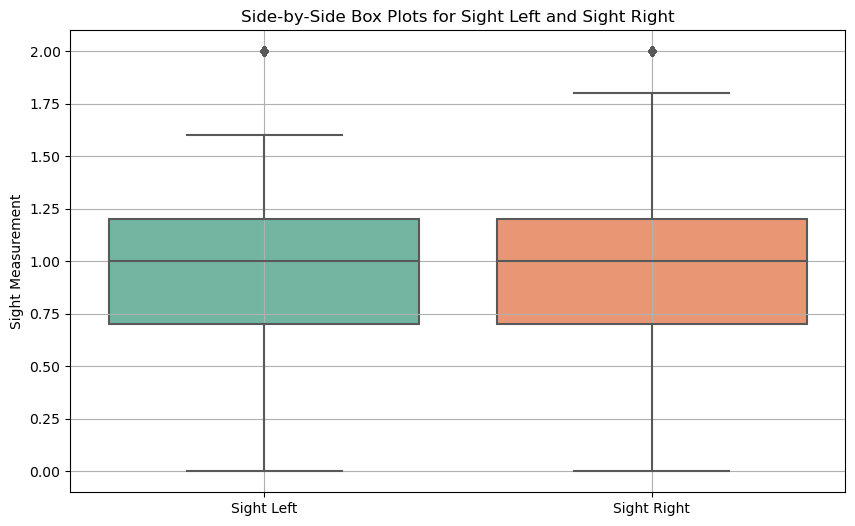

In [15]:
# Create side-by-side box plots to compare 'sight_left' and 'sight_right' measurements
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sight_left', 'sight_right']], orient='v', palette='Set2')
plt.title('Side-by-Side Box Plots for Sight Left and Sight Right')
plt.ylabel('Sight Measurement')
plt.xticks([0, 1], ['Sight Left', 'Sight Right'])
plt.grid(True)
plt.show()

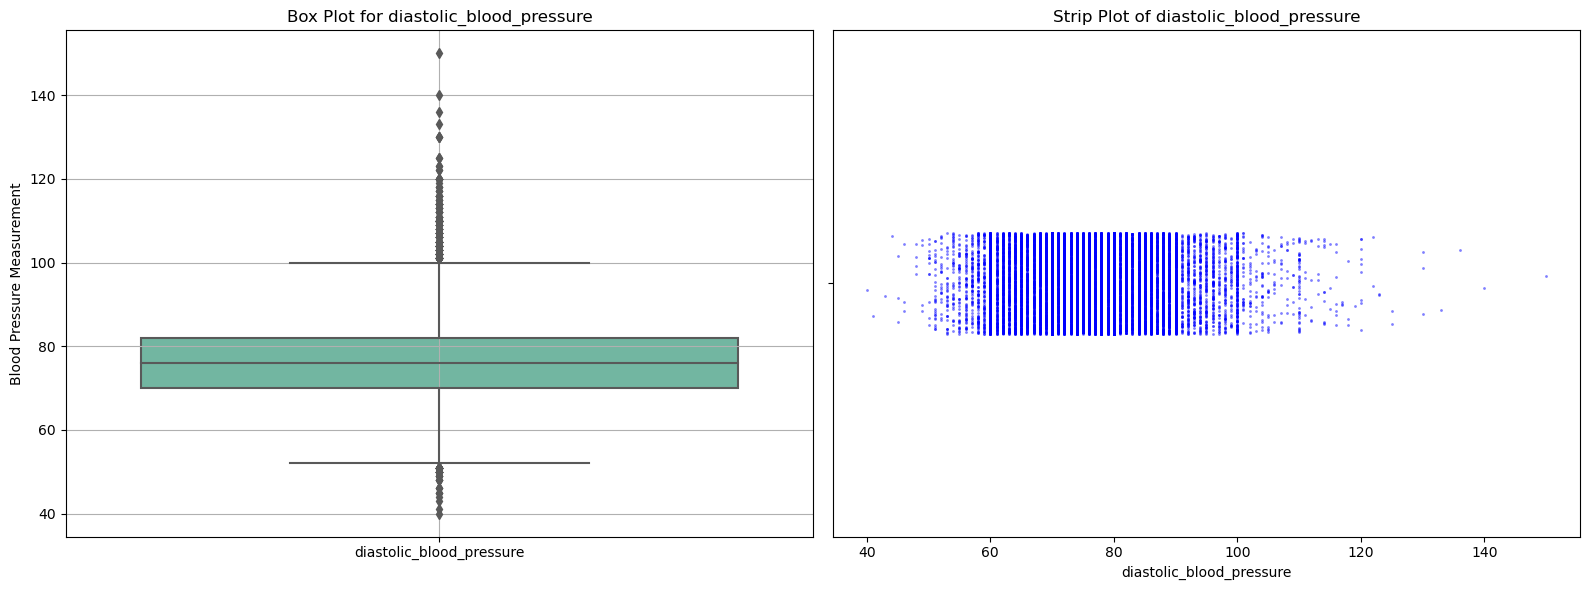

In [16]:
variable_name = 'diastolic_blood_pressure'

# Create side-by-side box plots and strip plots
plt.figure(figsize=(16, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df[variable_name], orient='v', palette='Set2')
plt.title(f'Box Plot for {variable_name}')
plt.ylabel('Blood Pressure Measurement')
plt.xticks([0], [variable_name])
plt.grid(True)

# Strip plot
plt.subplot(1, 2, 2)
sns.stripplot(x=df[variable_name], color='blue', size=2, alpha=0.5)
plt.title(f'Strip Plot of {variable_name}')
plt.xlabel(f'{variable_name}')

plt.tight_layout()
plt.show()

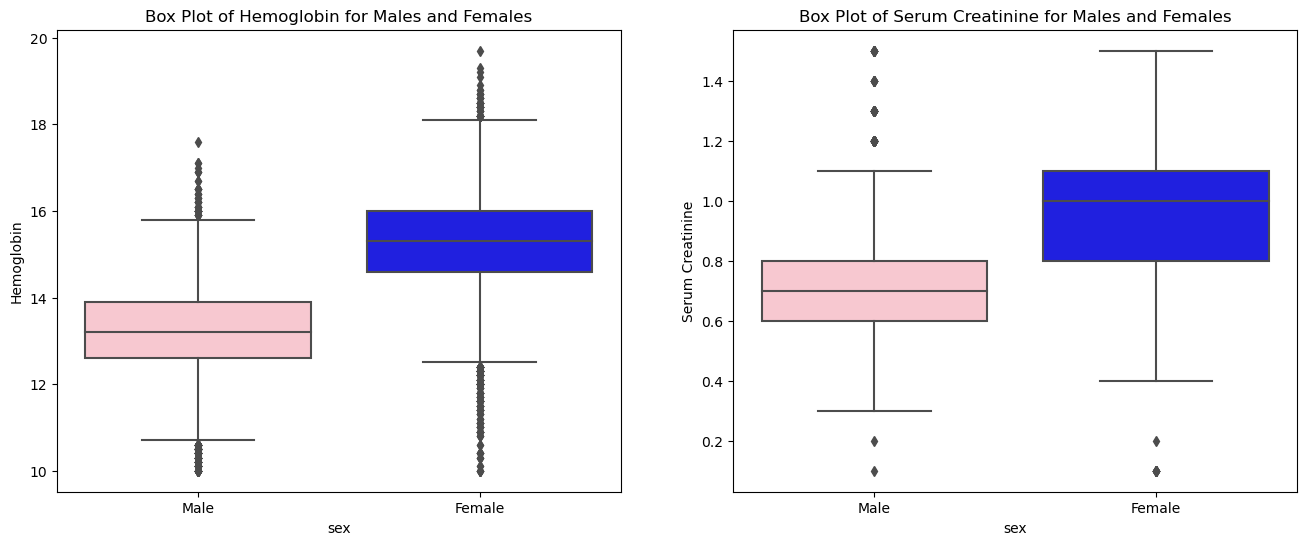

In [17]:
# Create separate DataFrames for male and female data
male_data = df[df['sex'] == 1]
female_data = df[df['sex'] == 0]

# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Box plot for 'hemoglobin'
sns.boxplot(x='sex', y='hemoglobin', data=df, palette={0: "pink", 1: "blue"}, ax=axes[0])
axes[0].set_title('Box Plot of Hemoglobin for Males and Females')
axes[0].set_ylabel('Hemoglobin')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Male', 'Female'])

# Box plot for 'serum_creatinine'
sns.boxplot(x='sex', y='serum_creatinine', data=df, palette={0: "pink", 1: "blue"}, ax=axes[1])
axes[1].set_title('Box Plot of Serum Creatinine for Males and Females')
axes[1].set_ylabel('Serum Creatinine')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Male', 'Female'])

plt.show()

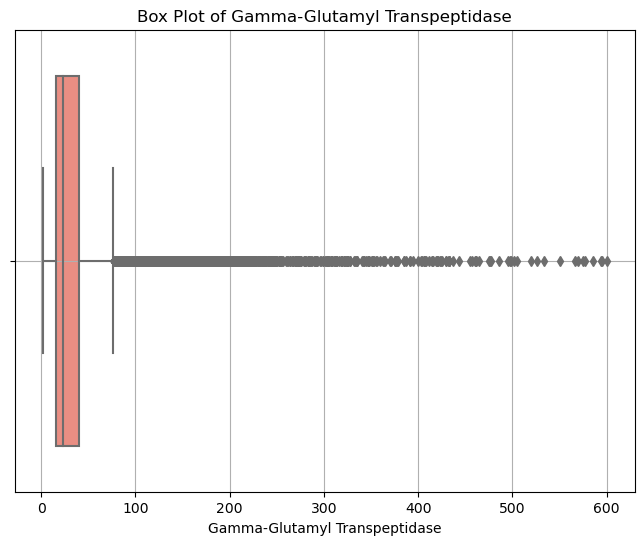

In [18]:
# Create a box plot to visualize the distribution of the 'gamma-glutamyl_transpeptidase' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gamma-glutamyl_transpeptidase'], color='salmon')
plt.title('Box Plot of Gamma-Glutamyl Transpeptidase')
plt.xlabel('Gamma-Glutamyl Transpeptidase')
plt.grid(True)
plt.show()

<h3 style="font-family: 'Times New Roman'">Save Dataset</h3>

In [19]:
df = df.to_csv('Files/Exploration_and_Stats_AfterPP/Drinking.csv', index = False)